In [1]:
library(GLMsData)
data(cheese)

In [2]:
str(cheese)

'data.frame':	30 obs. of  4 variables:
 $ Taste : num  12.3 20.9 39 47.9 5.6 25.9 37.3 21.9 18.1 21 ...
 $ Acetic: int  94 174 214 317 106 298 362 436 134 189 ...
 $ H2S   : int  23 155 230 1801 45 2000 6161 2881 47 65 ...
 $ Lactic: num  0.86 1.53 1.57 1.81 0.99 1.09 1.29 1.78 1.29 1.58 ...


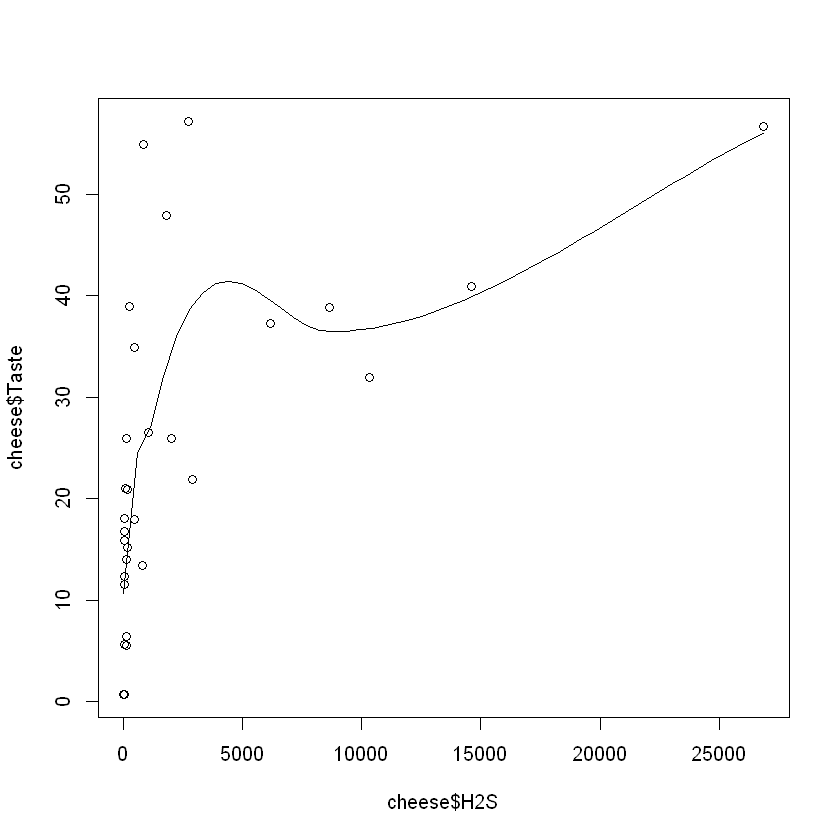

In [4]:
scatter.smooth(cheese$Taste ~ cheese$H2S)

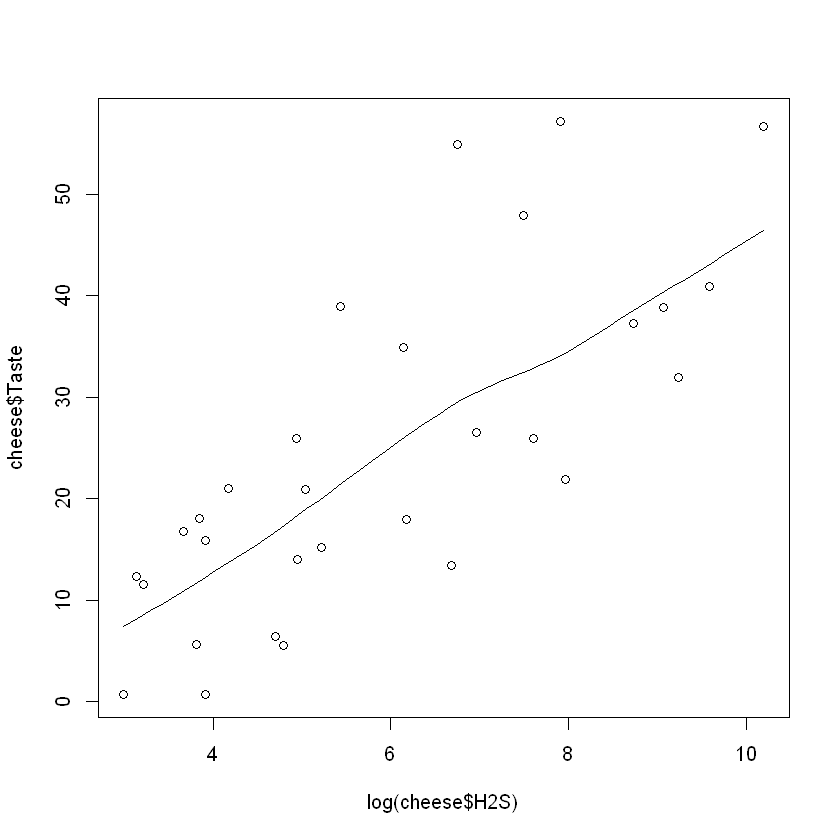

In [5]:
scatter.smooth(cheese$Taste ~ log(cheese$H2S))

In [6]:
lm.1 <- lm(Taste ~ Acetic + log(H2S) + Lactic, data=cheese)

In [7]:
coef(summary(lm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-27.142492645,9.27792427,-2.9254919,0.007046935
Acetic,0.004184487,0.01491638,0.2805296,0.781291374
log(H2S),3.836798704,1.21989457,3.1451888,0.004125560
Lactic,19.201964656,8.45761565,2.2703757,0.031706092


In [8]:
anova(lm.1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Acetic,1,2018.1937,2018.1937,19.720120,0.0001470783
log(H2S),1,2456.2728,2456.2728,24.000667,0.0000438645
Lactic,1,527.5319,527.5319,5.154606,0.0317060917
Residuals,26,2660.8883,102.3419,NA,NA


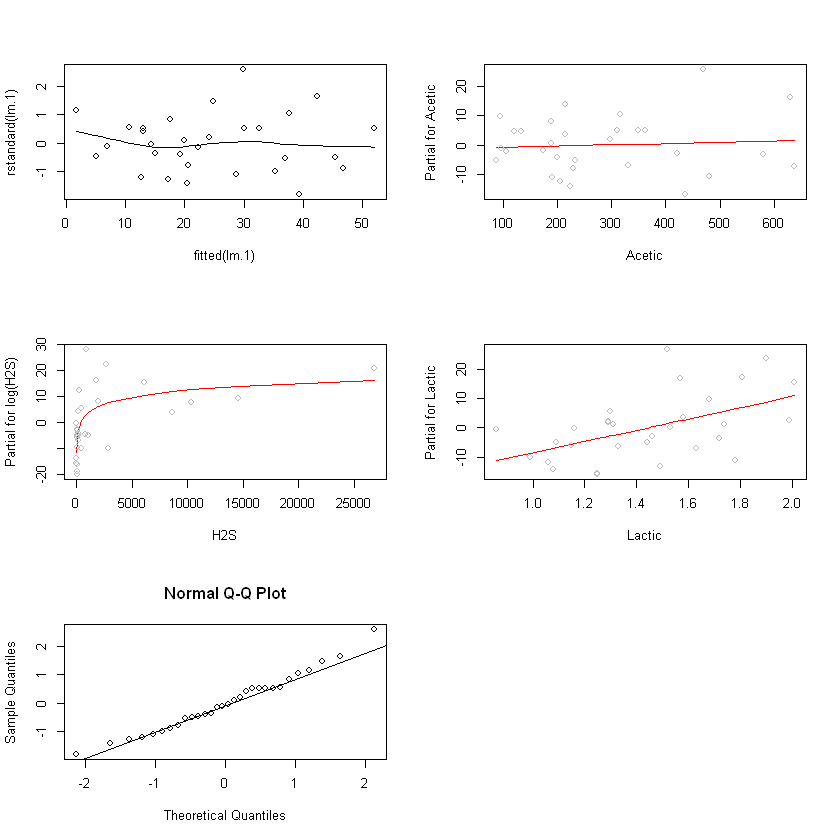

In [11]:
par(mfrow=c(3, 2))
scatter.smooth(rstandard(lm.1) ~ fitted(lm.1))
termplot(lm.1, partial.resid = TRUE, terms = "Acetic")
termplot(lm.1, partial.resid = TRUE, terms = "log(H2S)")
termplot(lm.1, partial.resid = TRUE, terms = "Lactic")
qqnorm(rstandard(lm.1))
qqline(rstandard(lm.1))

Partial residual plots đối với log(H2S) không có dạng tuyến tính => Mô hình tệ


In [12]:
influence.measures(lm.1)

Influence measures of
	 lm(formula = Taste ~ Acetic + log(H2S) + Lactic, data = cheese) :

     dfb.1_ dfb.Actc  dfb.l.H2 dfb.Lctc   dffit cov.r   cook.d    hat inf
1   0.46343 -0.03951 -0.011098 -0.29778  0.5007 1.139 6.20e-02 0.1616    
2   0.00772  0.02223  0.013808 -0.02593 -0.0423 1.268 4.65e-04 0.0803    
3  -0.10450 -0.17743 -0.124066  0.25761  0.4027 0.893 3.87e-02 0.0679    
4  -0.22145 -0.11194  0.022734  0.22471  0.3426 1.083 2.92e-02 0.0943    
5  -0.04174  0.01028 -0.001849  0.02529 -0.0489 1.318 6.22e-04 0.1150    
6   0.05862  0.00870  0.071580 -0.08432  0.0990 1.490 2.55e-03 0.2192   *
7   0.09227  0.02501  0.206254 -0.18570  0.2558 1.405 1.68e-02 0.2011    
8   0.29237 -0.12731 -0.065756 -0.19390 -0.5727 0.745 7.45e-02 0.0834    
9   0.05240 -0.05652 -0.064516  0.03315  0.1523 1.216 5.97e-03 0.0785    
10 -0.00913 -0.01164 -0.024869  0.02883  0.0393 1.336 4.01e-04 0.1262    
11 -0.05907 -0.01308 -0.044328  0.08999  0.1308 1.204 4.40e-03 0.0652    
12 -0.34736  0.63030 